In [12]:
import hifive
import pyBigWig
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache using fc-list. This may take a moment.


## Loading in Data

in Bash: 

hifive fends -L 3DGenomeData/genome/mm9.len --binned 100000 -g mm9 partition_file

hifive hic-data -X CDGenomeData/data/WT100kb/raw*.mat partition_file interaction_counts

hifive hic-project -f25 -n25 -j100000 interaction_counts hic_proj

hifive hic-normalize express -f 25 -w cis hic_proj

## Working with Hi-C Data

In [3]:
hic = hifive.HiC('/Users/cmdb/qbb2020-answers/quantbio/week11/hic_proj', 'r')

In [4]:
data = hic.cis_heatmap('chr1', 1000000, datatype='fend', arraytype='full', diagonalincluded=True)

Finding fend full array for chr1:1000000-197150001... Done


In [10]:
data +=1
enrichment = data[:, :, 0] / data[:, :, 1]
enrichment_log = np.log2(data[:, :, 0]) / (data[:, :, 1]) #log transform array

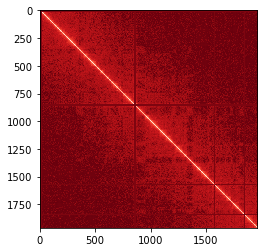

In [31]:
fig, ax = plt.subplots()
plt.imshow(enrichment_log, cmap='Reds_r')
plt.show()

## Compartment analysis

In [6]:
Comp = hifive.hic_domains.Compartment(hic, 100000, chroms=['chr13'], out_fname='tmp.hdf5')
Comp.write_eigen_scores('hic_comp.bed')

Finding expected full array for chr13:3000000-120300000... Done
Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an arr

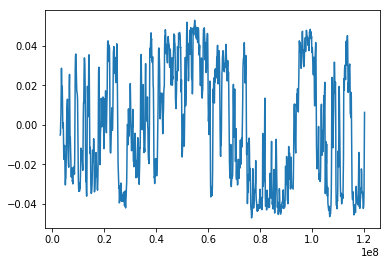

In [34]:
X = Comp.positions['chr13']
Y = Comp.eigenv['chr13']

plt.plot(X[:,0],Y)
plt.show()

In [ ]:
in bash: 
    
grep "-" hic_comp.bed > neg_score.bed

grep -v - hic_comp.bed > pos_score.bed

bedtools intersect -wo -a 3DGenomeData/data/WT_fpkm.bed -b neg_score.bed > comp_neg.bed

bedtools intersect -wo -a 3DGenomeData/data/WT_fpkm.bed -b pos_score.bed > comp_pos.bed

In [81]:
#use pandas data frames?? jk jk this is too much 
#numpy to the rescue!!!!!!!!
#bed is text file, upload data into numpy array 
neg_array = np.genfromtxt ('comp_neg.bed')
pos_array = np.genfromtxt ('comp_pos.bed')
#neg_log=np.log(neg_array) #divide by zero error
#pos_log=np.log(pos_array)
neg_log = np.log2(neg_array[:,2]+1)
pos_log = np.log2(pos_array[:,2]+1)
violin_data = [pos_log, neg_log]


In [82]:
neg_array

array([[            nan,  3.14872100e+06,  3.18892400e+06, ...,
         3.20000000e+06, -4.57800000e-03,  4.02030000e+04],
       [            nan,  4.05883700e+06,  4.08966800e+06, ...,
         4.10000000e+06, -7.16000000e-04,  3.08310000e+04],
       [            nan,  4.13186100e+06,  4.14989200e+06, ...,
         4.20000000e+06, -1.67500000e-03,  1.80310000e+04],
       ...,
       [            nan,  1.19392217e+08,  1.19447550e+08, ...,
         1.19500000e+08, -3.39310000e-02,  4.75500000e+04],
       [            nan,  1.19503506e+08,  1.19581380e+08, ...,
         1.19600000e+08, -3.47770000e-02,  7.78740000e+04],
       [            nan,  1.20124334e+08,  1.20198064e+08, ...,
         1.20200000e+08, -1.58820000e-02,  7.37300000e+04]])

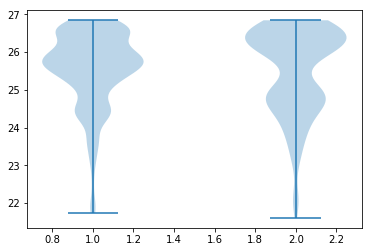

In [83]:
fig = plt.figure()
ax = fig.subplots()
viv_plot = ax.violinplot(violin_data)
plt.show()#why you upside down????????????

## Expression vs. Repression

In [64]:
bw = pyBigWig.open('3DGenomeData/data/WT_H3K27me3.bw')
bw.stats('chr1', 1100000, 1200000, type='sum')

[None]